<a href="https://colab.research.google.com/github/Jenny0229/PiazzaPost_Classification/blob/main/exploratory_topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import nltk
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
file_path1 = "https://raw.githubusercontent.com/Jenny0229/PiazzaPost_Classification/main/sp16_projects_exam.csv?token=GHSAT0AAAAAACEAZTCIFMPGSOGNNIZ7OKGUZF7NDBQ"
file1 = pd.read_csv(file_path1, index_col=0)
file_path2 = "https://raw.githubusercontent.com/Jenny0229/PiazzaPost_Classification/main/w16_projects_exam.csv?token=GHSAT0AAAAAACEAZTCIBUGNHZBX7MMNQIDMZF7NCQA"
file2 = pd.read_csv(file_path2, index_col=0)

In [ ]:
posts = pd.DataFrame()
posts = pd.concat([posts, file1], axis=0)
posts = pd.concat([posts, file2], axis=0)
posts.to_csv('merged_files.csv', index=False)

In [ ]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2884 entries, exam to statistics
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2884 non-null   object
dtypes: object(1)
memory usage: 45.1+ KB


In [ ]:
posts.head()

content
tag                                                     
exam   final exam scores have been released and regra...
exam   this message contains details for the eecs 280...
image  if youve got your resize program working feel ...
exam   please do not discuss the exam until 400 today...
exam                   how is this 3 3 why is it not 2 1

In [ ]:
#posts = posts.dropna()
posts["content"].fillna("", inplace = True)

In [ ]:
posts["id"] = range(len(train_data))

ValueError: ignored

In [ ]:
posts["tag"].value_counts()

KeyError: ignored

<Axes: >

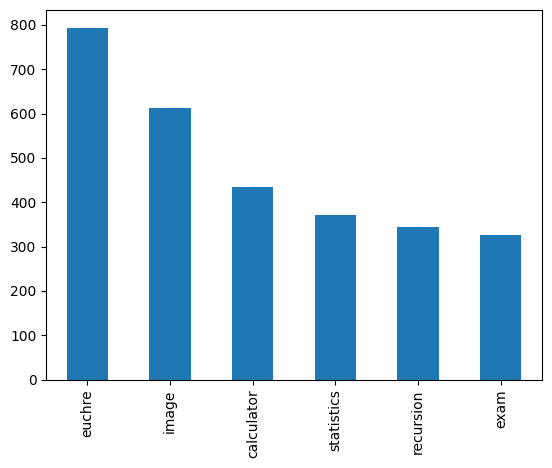

In [ ]:
posts["tag"].value_counts().plot(kind='bar')

In [ ]:
posts['content']=posts['content'].apply(str)

In [ ]:
posts['length'] = posts['content'].apply(len)

In [ ]:
print(posts.max(axis = 0))

tag                                               statistics
content    youre probably aware the autograders down agai...
length                                                  6259
dtype: object


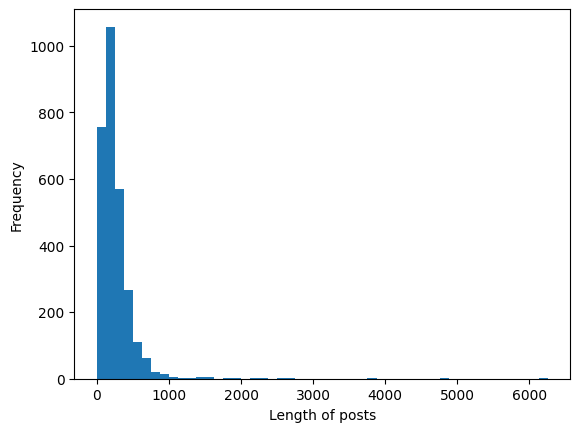

In [ ]:
posts['length'].plot.hist( bins=50)
plt.xlabel('Length of posts')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

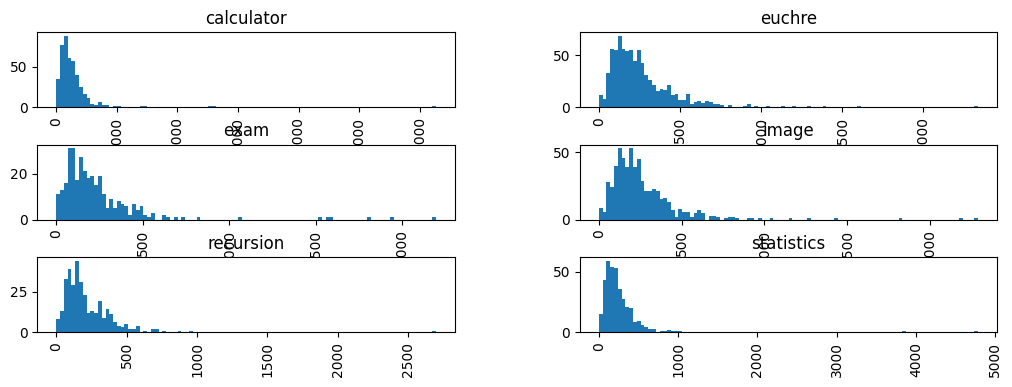

In [ ]:
posts.hist(column='length',by='tag', bins=100, figsize=(12,4))
plt.show()

In [ ]:
def show_wordcloud(df, title):
  text = ' '.join(df['content'].astype(str).tolist())
  word_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS, max_font_size=50, background_color ="black",
                          colormap='Blues').generate(text)
  plt.figure(figsize=(16,10))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis('off') # not display axis
  plt.show()

In [ ]:
data_euchre  = posts[posts['tag'] == "euchre"]
data_cal  = posts[posts['tag'] == "calculator"]
data_rec  = posts[posts['tag'] == "recursion"]
data_img  = posts[posts['tag'] == "image"]
data_stats  = posts[posts['tag'] == "statistics"]
data_exam  = posts[posts['tag'] == "exam"]

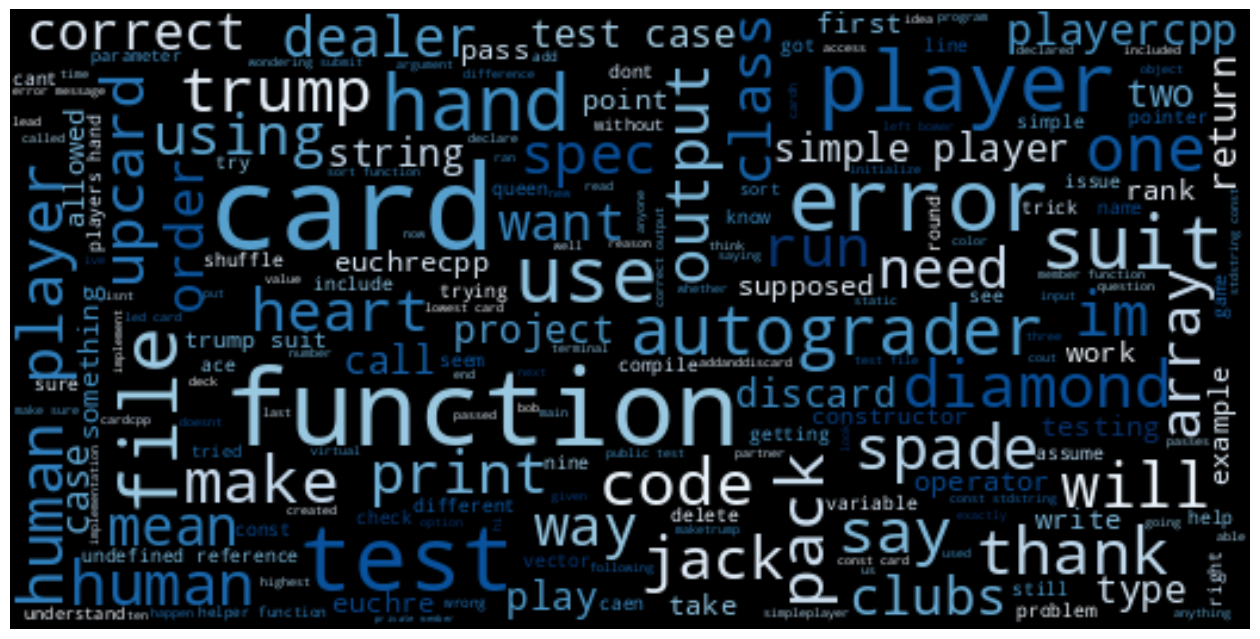

In [ ]:
show_wordcloud(data_euchre, "euchre posts")

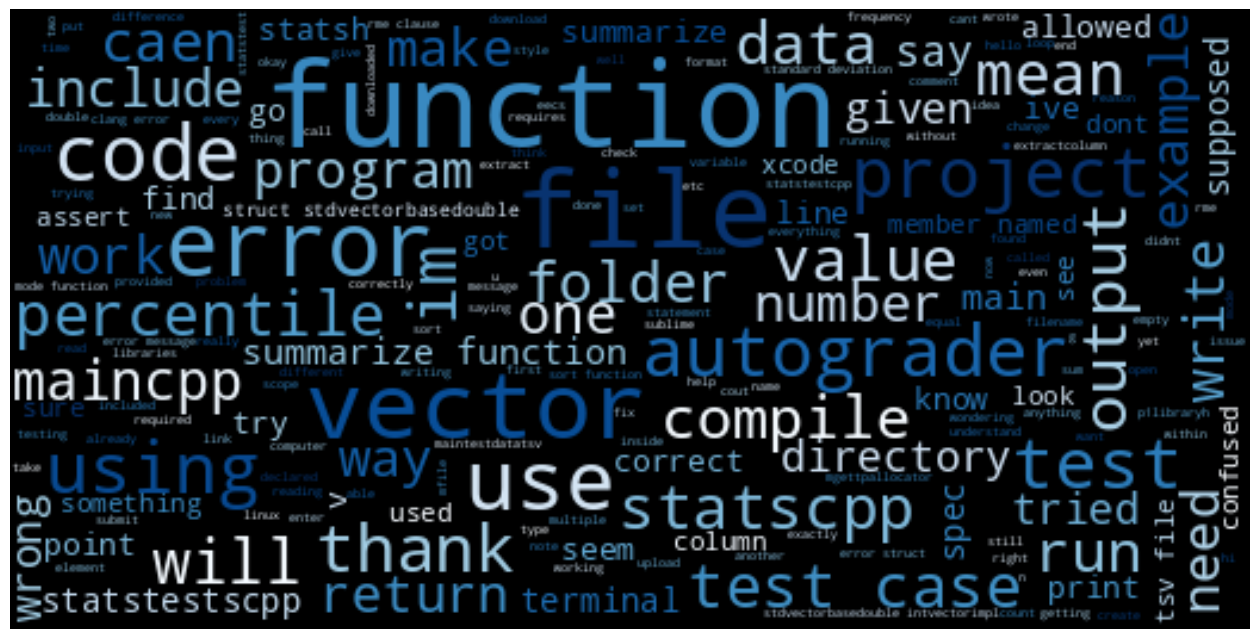

In [ ]:
show_wordcloud(data_stats, "stats posts")

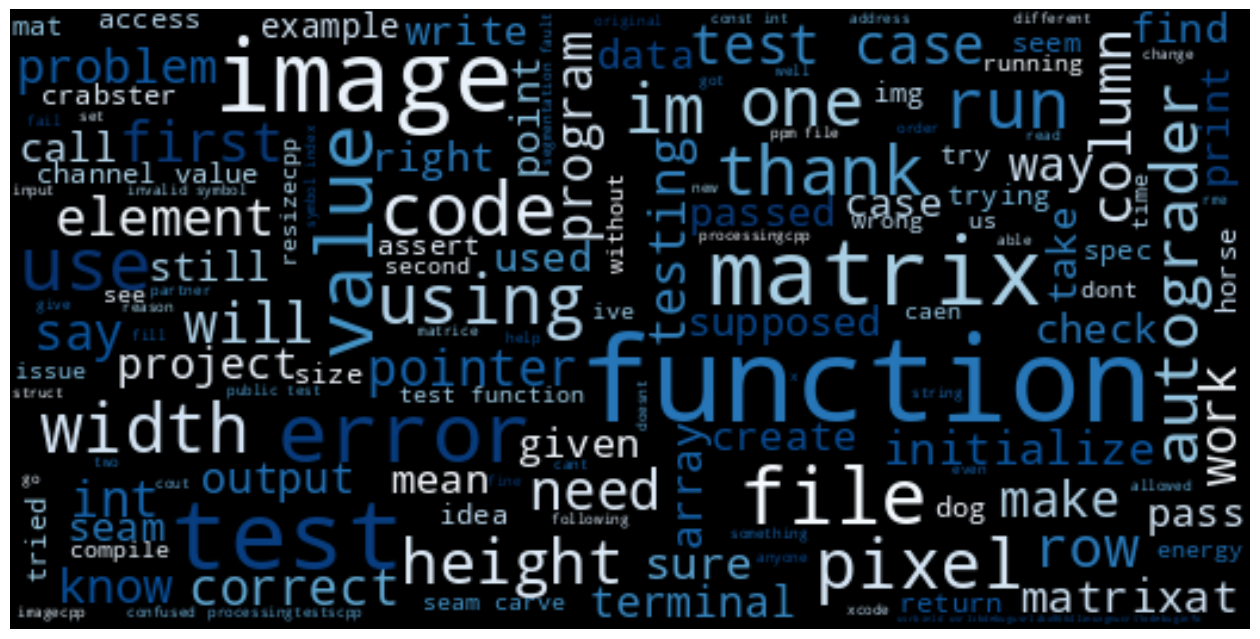

In [ ]:
show_wordcloud(data_img, "image posts")

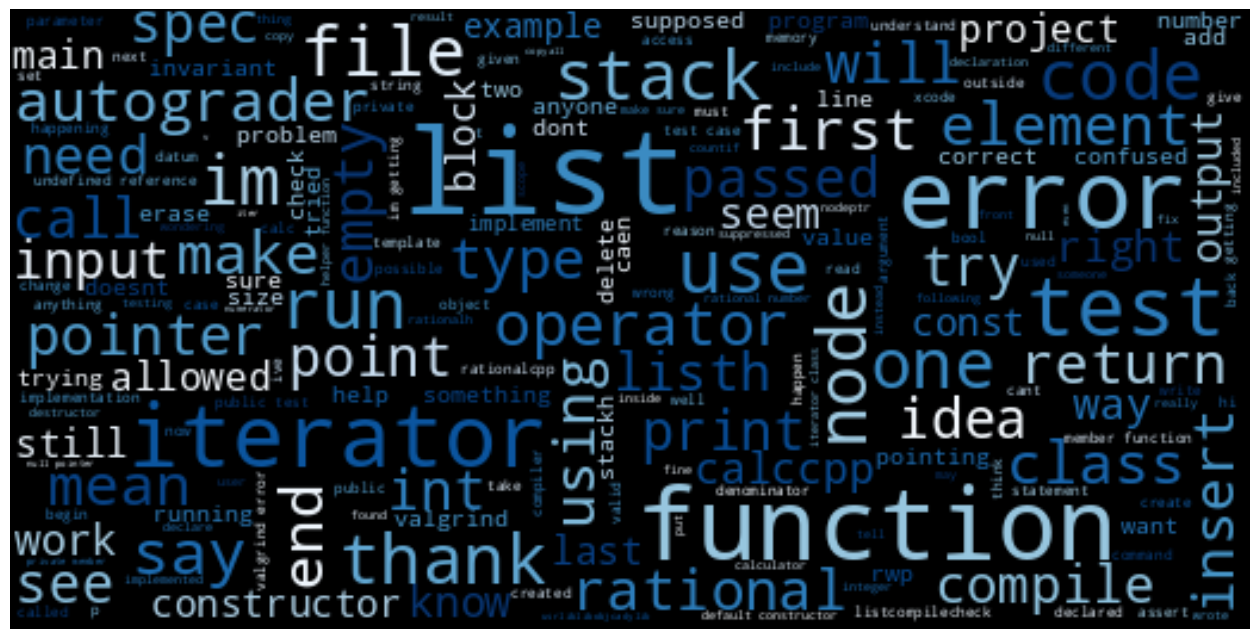

In [ ]:
show_wordcloud(data_cal, "calculator posts")

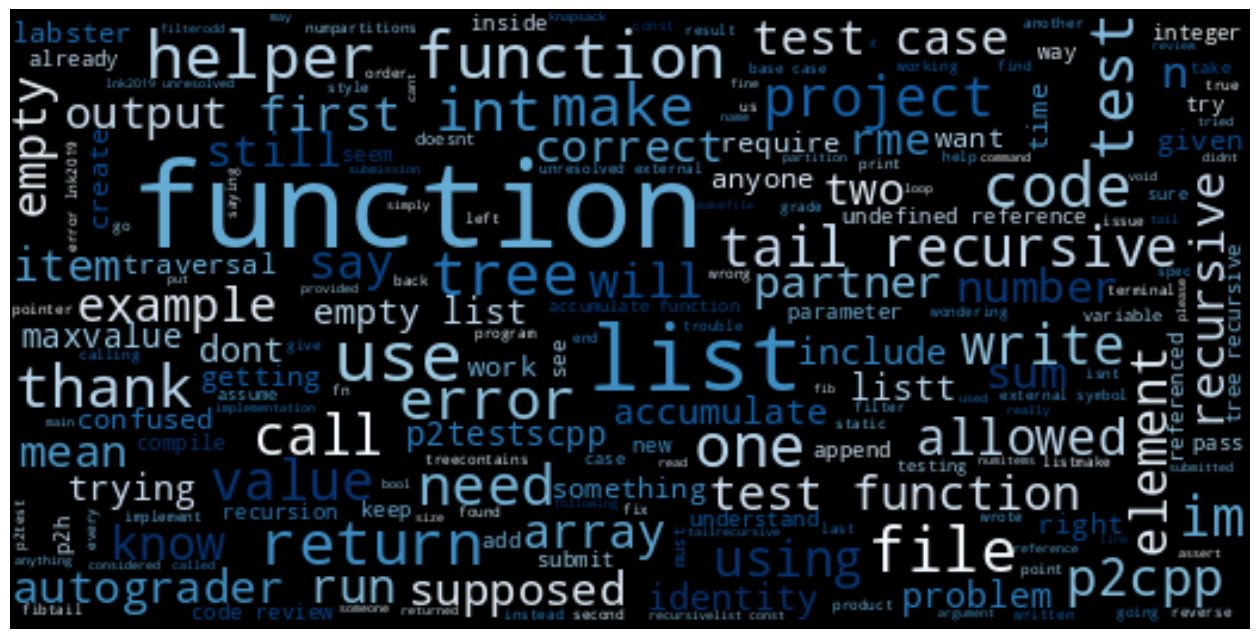

In [ ]:
show_wordcloud(data_rec, "recursion posts")

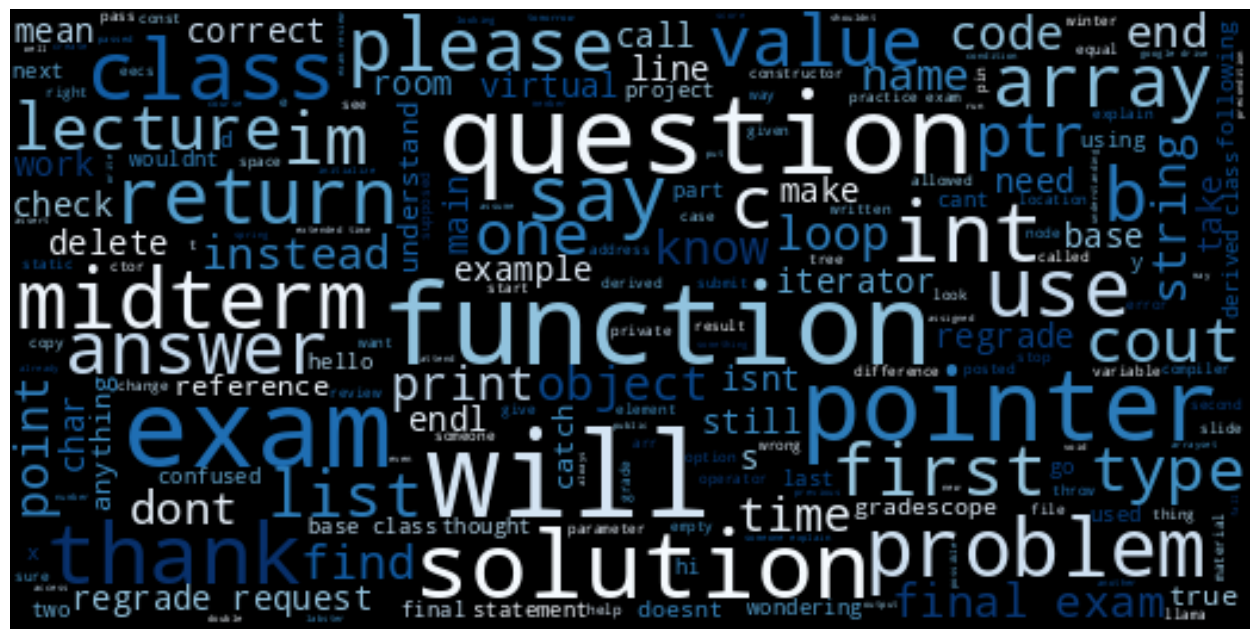

In [ ]:
show_wordcloud(data_exam, "exam posts")

In [ ]:
posts.head()

tag                                            content  length
0   exam  final exam scores have been released and regra...     367
1   exam  this message contains details for the eecs 280...    1580
2  image  if youve got your resize program working feel ...     104
3   exam  please do not discuss the exam until 400 today...      56
4   exam                  how is this 3 3 why is it not 2 1      33

In [ ]:
train_data, test_data = train_test_split(posts, test_size = 0.2, random_state = 42)

In [ ]:
df_bert = pd.DataFrame({'C': range(len(train_data)),
    'label': train_data['tag'],
    'alpha': ['a']*train_data.shape[0],
    'text': train_data['content']})

In [ ]:
df_bert.head()

C       label alpha                                               text
1476  0       image     a  when i was trying to test my work against the ...
1094  1      euchre     a  are we allowed to initialize the cards array i...
632   2      euchre     a  we are receiving this error when we run make e...
2274  3  statistics     a  im a bit confused on the vector of a vector in...
330   4  calculator     a  hi i tried looking for an answer for this alre...

1. convert the train & test dataset into a bert-accpeted format, which includes add id, add meaningless letter, convert tag to number, remove header, etc
2. further split training data to training and dev
3. output tsv file for train, dev, and test